# Commodity Volatility Analysis in Python

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import norm

### Download historical price data for USO and GLD ETFs

### USO (United States Oil Fund)

- This ETF tracks the price of West Texas Intermediate (WTI) crude oil
- It's designed to reflect the daily changes in percentage terms of the price of WTI crude oil
- USO holds oil futures contracts and rolls them forward to maintain exposure
- It's one of the most popular ways for retail investors to gain exposure to oil prices without trading futures directly

### GLD (SPDR Gold Shares)

- This ETF tracks the price of gold bullion
- It's backed by physical gold stored in vaults, primarily in London
- Each share represents a fractional ownership of gold (approximately 1/10th of an ounce)
- GLD is the largest and most liquid gold ETF, making it a standard choice for gold exposure

In [2]:
symbols = ['USO', 'GLD']
data = yf.download(symbols, start='2010-01-01', end='2025-06-30')
data

C:\Users\skabb\AppData\Local\Temp\ipykernel_19460\3556912755.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start='2010-01-01', end='2025-06-30')
[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker             GLD         USO         GLD         USO         GLD   
Date                                                                     
2010-01-04  109.800003  322.160004  110.139999  322.399994  109.309998   
2010-01-05  109.699997  323.279999  110.389999  323.600006  109.260002   
2010-01-06  111.510002  327.760010  111.769997  329.519989  110.410004   
2010-01-07  110.820000  325.760010  111.290001  328.640015  110.620003   
2010-01-08  111.370003  327.440002  111.580002  329.359985  110.260002   
...                ...         ...         ...         ...         ...   
2025-06-23  311.079987   76.410004  312.670013   83.570000  310.309998   
2025-06-24  306.190002   73.000000  306.339996   73.860001  303.540009   
2025-06-25  307.119995   73.309998  307.359985   74.230003  305.119995   
2025-06-26  306.779999   73.589996  307.279999   74.680000  304.859985   
2025-06-27  301.220001   73.279999  302.359985   74.339996  299.890015   

Price                         Open                Volume            
Ticker             USO         GLD         USO       GLD       USO  
Date                                                                
2010-01-04  318.959991  109.820000  320.320007  16224100   1426038  
2010-01-05  319.440002  109.879997  322.000000  14213100   1306275  
2010-01-06  319.119995  110.709999  322.559998  24981900   2473725  
2010-01-07  325.440002  111.070000  326.959991  13609800   1252963  
2010-01-08  323.600006  111.519997  325.040009  15894600   1174188  
...                ...         ...         ...       ...       ...  
2025-06-23   76.410004  310.339996   83.250000  12687900  50659400  
2025-06-24   71.970001  305.070007   73.339996  12035200  16119600  
2025-06-25   72.790001  305.309998   72.930000   6733200  12401000  
2025-06-26   73.089996  305.769989   73.629997   6787500   9514900  
2025-06-27   72.870003  300.029999   74.019997  13301300  11610800  

[3895 rows x 10 columns]

In [3]:
data['Close']

Ticker,GLD,USO
Date,,
2010-01-04,109.800003,322.160004
2010-01-05,109.699997,323.279999
2010-01-06,111.510002,327.760010
2010-01-07,110.820000,325.760010
2010-01-08,111.370003,327.440002
...,...,...
2025-06-23,311.079987,76.410004
2025-06-24,306.190002,73.000000
2025-06-25,307.119995,73.309998


Remove any rows that contain missing values 

In [4]:
data.dropna(inplace=True)
data

Price            Close                    High                     Low  \
Ticker             GLD         USO         GLD         USO         GLD   
Date                                                                     
2010-01-04  109.800003  322.160004  110.139999  322.399994  109.309998   
2010-01-05  109.699997  323.279999  110.389999  323.600006  109.260002   
2010-01-06  111.510002  327.760010  111.769997  329.519989  110.410004   
2010-01-07  110.820000  325.760010  111.290001  328.640015  110.620003   
2010-01-08  111.370003  327.440002  111.580002  329.359985  110.260002   
...                ...         ...         ...         ...         ...   
2025-06-23  311.079987   76.410004  312.670013   83.570000  310.309998   
2025-06-24  306.190002   73.000000  306.339996   73.860001  303.540009   
2025-06-25  307.119995   73.309998  307.359985   74.230003  305.119995   
2025-06-26  306.779999   73.589996  307.279999   74.680000  304.859985   
2025-06-27  301.220001   73.279999  302.359985   74.339996  299.890015   

Price                         Open                Volume            
Ticker             USO         GLD         USO       GLD       USO  
Date                                                                
2010-01-04  318.959991  109.820000  320.320007  16224100   1426038  
2010-01-05  319.440002  109.879997  322.000000  14213100   1306275  
2010-01-06  319.119995  110.709999  322.559998  24981900   2473725  
2010-01-07  325.440002  111.070000  326.959991  13609800   1252963  
2010-01-08  323.600006  111.519997  325.040009  15894600   1174188  
...                ...         ...         ...       ...       ...  
2025-06-23   76.410004  310.339996   83.250000  12687900  50659400  
2025-06-24   71.970001  305.070007   73.339996  12035200  16119600  
2025-06-25   72.790001  305.309998   72.930000   6733200  12401000  
2025-06-26   73.089996  305.769989   73.629997   6787500   9514900  
2025-06-27   72.870003  300.029999   74.019997  13301300  11610800  

[3895 rows x 10 columns]

Calculate the daily percentage returns for your commodities and remove the first row which will be NaN.

In [5]:
returns = data.pct_change().dropna()
returns

Price          Close                High                 Low            \
Ticker           GLD       USO       GLD       USO       GLD       USO   
Date                                                                     
2010-01-05 -0.000911  0.003477  0.002270  0.003722 -0.000457  0.001505   
2010-01-06  0.016500  0.013858  0.012501  0.018294  0.010525 -0.001002   
2010-01-07 -0.006188 -0.006102 -0.004294 -0.002670  0.001902  0.019804   
2010-01-08  0.004963  0.005157  0.002606  0.002191 -0.003254 -0.005654   
2010-01-11  0.013289 -0.009528  0.018014  0.000486  0.020497  0.000247   
...              ...       ...       ...       ...       ...       ...   
2025-06-23  0.003063 -0.080727  0.005725  0.002279  0.003428 -0.066577   
2025-06-24 -0.015719 -0.044628 -0.020245 -0.116190 -0.021817 -0.058108   
2025-06-25  0.003037  0.004247  0.003330  0.005010  0.005205  0.011394   
2025-06-26 -0.001107  0.003819 -0.000260  0.006062 -0.000852  0.004121   
2025-06-27 -0.018124 -0.004212 -0.016011 -0.004553 -0.016302 -0.003010   

Price           Open              Volume            
Ticker           GLD       USO       GLD       USO  
Date                                                
2010-01-05  0.000546  0.005245 -0.123951 -0.083983  
2010-01-06  0.007554  0.001739  0.757667  0.893725  
2010-01-07  0.003252  0.013641 -0.455214 -0.493491  
2010-01-08  0.004051 -0.005872  0.167879 -0.062871  
2010-01-11  0.016320  0.011322  0.085463 -0.044456  
...              ...       ...       ...       ...  
2025-06-23  0.003265  0.012158  0.442676  2.560292  
2025-06-24 -0.016981 -0.119039 -0.051443 -0.681804  
2025-06-25  0.000787 -0.005590 -0.440541 -0.230688  
2025-06-26  0.001507  0.009598  0.008065 -0.232731  
2025-06-27 -0.018772  0.005297  0.959676  0.220276  

[3894 rows x 10 columns]

# Rolling volatility (20-day window)

Calculate the annualized rolling volatility for your commodities, which measures how much the prices fluctuate over time

## What is Annualized Rolling Volatility?
Annualized rolling volatility is a measure that tells you how much an asset's price is expected to fluctuate over a full year, based on recent daily price movements. It's expressed as a percentage and updates daily as new data comes in.
Think of it as a "risk thermometer" that shows:

- Low volatility (10-20%): Relatively stable, predictable price movements
- Medium volatility (20-40%): Moderate price swings
- High volatility (40%+): Wild, unpredictable price movements

In [6]:
volatility = returns.rolling(window=20).std() * np.sqrt(252)
volatility

Price          Close                High                 Low            \
Ticker           GLD       USO       GLD       USO       GLD       USO   
Date                                                                     
2010-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-07       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-08       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-11       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2025-06-23  0.180825  0.482228  0.168452  0.357006  0.161154  0.453982   
2025-06-24  0.173288  0.514963  0.174994  0.575520  0.168859  0.510010   
2025-06-25  0.162334  0.512106  0.163798  0.573235  0.160545  0.508774   
2025-06-26  0.162127  0.511865  0.163817  0.570591  0.160591  0.505502   
2025-06-27  0.173592  0.509973  0.172174  0.564852  0.170095  0.500972   

Price           Open              Volume             
Ticker           GLD       USO       GLD        USO  
Date                                                 
2010-01-05       NaN       NaN       NaN        NaN  
2010-01-06       NaN       NaN       NaN        NaN  
2010-01-07       NaN       NaN       NaN        NaN  
2010-01-08       NaN       NaN       NaN        NaN  
2010-01-11       NaN       NaN       NaN        NaN  
...              ...       ...       ...        ...  
2025-06-23  0.158096  0.365707  4.509457  12.546340  
2025-06-24  0.164084  0.589895  4.354258  13.053556  
2025-06-25  0.153130  0.591048  4.537127  13.120552  
2025-06-26  0.152933  0.590604  4.521506  13.245297  
2025-06-27  0.166413  0.588057  5.609021  13.192236  

[3894 rows x 10 columns]

In [7]:
volatility.dropna()
volatility

Price          Close                High                 Low            \
Ticker           GLD       USO       GLD       USO       GLD       USO   
Date                                                                     
2010-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-07       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-08       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-11       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2025-06-23  0.180825  0.482228  0.168452  0.357006  0.161154  0.453982   
2025-06-24  0.173288  0.514963  0.174994  0.575520  0.168859  0.510010   
2025-06-25  0.162334  0.512106  0.163798  0.573235  0.160545  0.508774   
2025-06-26  0.162127  0.511865  0.163817  0.570591  0.160591  0.505502   
2025-06-27  0.173592  0.509973  0.172174  0.564852  0.170095  0.500972   

Price           Open              Volume             
Ticker           GLD       USO       GLD        USO  
Date                                                 
2010-01-05       NaN       NaN       NaN        NaN  
2010-01-06       NaN       NaN       NaN        NaN  
2010-01-07       NaN       NaN       NaN        NaN  
2010-01-08       NaN       NaN       NaN        NaN  
2010-01-11       NaN       NaN       NaN        NaN  
...              ...       ...       ...        ...  
2025-06-23  0.158096  0.365707  4.509457  12.546340  
2025-06-24  0.164084  0.589895  4.354258  13.053556  
2025-06-25  0.153130  0.591048  4.537127  13.120552  
2025-06-26  0.152933  0.590604  4.521506  13.245297  
2025-06-27  0.166413  0.588057  5.609021  13.192236  

[3894 rows x 10 columns]

## Line chart comparing the volatility patterns of GLD and USO over time

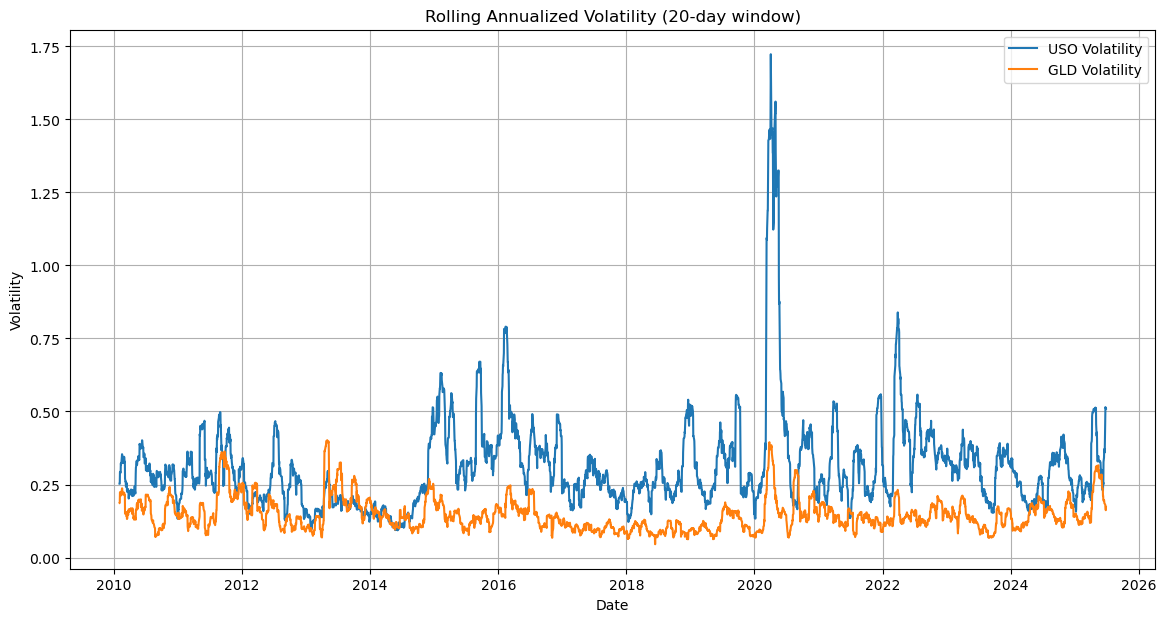

In [8]:
vol_close = volatility['Close']  # Now this is a regular DataFrame: columns = ['GLD', 'USO']

plt.figure(figsize=(14, 7))
for symbol in symbols:
    plt.plot(vol_close[symbol], label=f'{symbol} Volatility')
plt.title('Rolling Annualized Volatility (20-day window)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


What we see in the resulting chart:

- USO line: Likely more jagged with higher peaks (oil is volatile)
- GLD line: Probably smoother and lower (gold is more stable)

Volatility spikes: During major events like:

- 2014-2016 Oil Crash
- 2020 COVID Pandemic
- Recent geopolitical events

### Histogram of returns

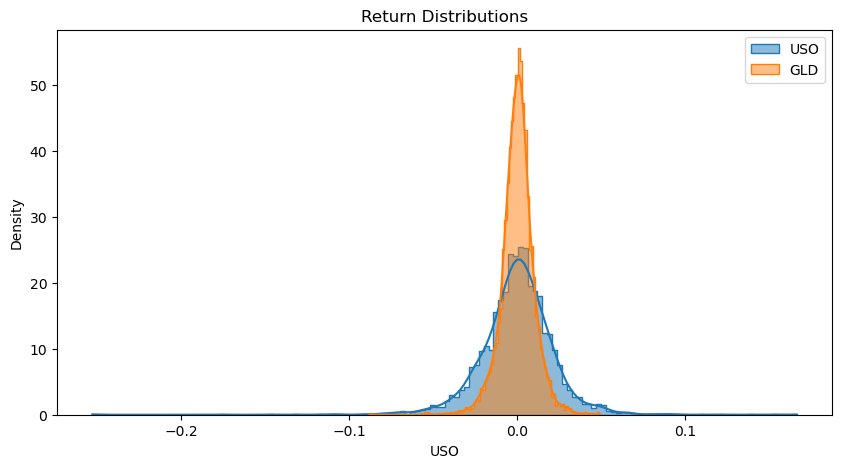

In [9]:
returns_close = returns['Close']

plt.figure(figsize=(10, 5))
for symbol in symbols:
    sns.histplot(returns_close[symbol], kde=True, stat="density", label=symbol, element="step")
plt.title('Return Distributions')
plt.legend()
plt.show()

### Descriptive stats

In [10]:
print(returns_close.describe())
print("\nSkewness:\n", returns_close.skew())
print("\nKurtosis:\n", returns_close.kurtosis())

Ticker          GLD          USO
count   3894.000000  3894.000000
mean       0.000308    -0.000125
std        0.009868     0.022382
min       -0.087808    -0.253150
25%       -0.004860    -0.011086
50%        0.000497     0.000711
75%        0.005554     0.011986
max        0.049038     0.166667

Skewness:
 Ticker
GLD   -0.368140
USO   -0.861412
dtype: float64

Kurtosis:
 Ticker
GLD     4.167120
USO    13.043075
dtype: float64


## Value at Risk (VaR) Analysis - 95% Confidence Level

In [11]:
confidence_level = 0.95
VaR = {}

for symbol in symbols:
    mean_return = returns_close[symbol].mean()
    std_dev = returns_close[symbol].std()
    VaR[symbol] = norm.ppf(1 - confidence_level, mean_return, std_dev)

print(f"Value at Risk (95% confidence): {VaR}")

Value at Risk (95% confidence): {'USO': np.float64(-0.036940392011612526), 'GLD': np.float64(-0.01592346957791708)}


## Correlation of daily returns

In [12]:
correlation_matrix = returns_close.corr()
correlation_matrix

Ticker,GLD,USO
Ticker,,
GLD,1.000000,0.140926
USO,0.140926,1.000000


## Heatmap

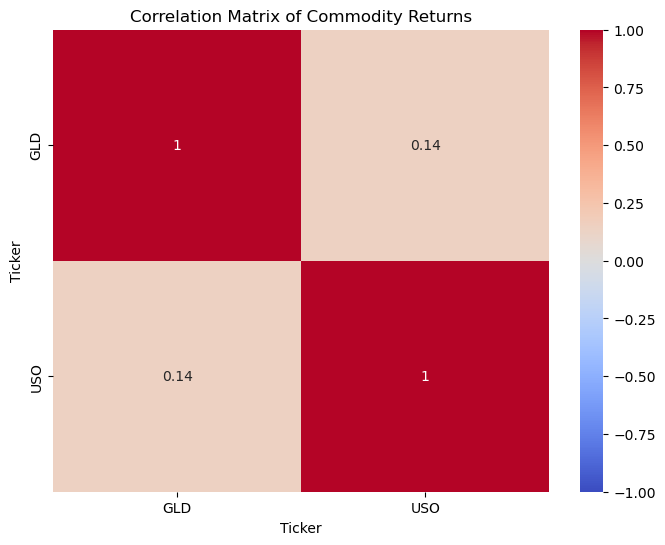

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Commodity Returns')
plt.show()

## A simple hedge ratio can be estimated using OLS regression.

Perform a hedge ratio analysis to determine how to use gold (GLD) to hedge against oil (USO) price movements.

In [14]:
import statsmodels.api as sm

# Hedge example: Hedge Oil (USO) using Gold (GLD)
X = returns_close['GLD']
Y = returns_close['USO']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())

hedge_ratio = model.params['GLD']
print(f"\nEstimated Hedge Ratio: {hedge_ratio:.4f}")

                            OLS Regression Results                            
Dep. Variable:                    USO   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     78.86
Date:                Sat, 23 Aug 2025   Prob (F-statistic):           9.98e-19
Time:                        00:41:46   Log-Likelihood:                 9309.5
No. Observations:                3894   AIC:                        -1.861e+04
Df Residuals:                    3892   BIC:                        -1.860e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.630      0.5

## Construct hedged return series

In [15]:
hedged_return = returns_close['USO'] - hedge_ratio * returns_close['GLD']
hedged_return

Date
2010-01-05    0.003768
2010-01-06    0.008584
2010-01-07   -0.004124
2010-01-08    0.003571
2010-01-11   -0.013776
                ...   
2025-06-23   -0.081706
2025-06-24   -0.039603
2025-06-25    0.003276
2025-06-26    0.004173
2025-06-27    0.001581
Length: 3894, dtype: float64

## Compare standard deviation (volatility)

In [16]:
original_vol = returns_close['USO'].std()
hedged_vol = hedged_return.std()

print(f"\nOriginal Volatility (USO): {original_vol:.4f}")
print(f"Hedged Volatility: {hedged_vol:.4f}")
print(f"Volatility Reduction: {(1 - hedged_vol/original_vol) * 100:.2f}%")


Original Volatility (USO): 0.0224
Hedged Volatility: 0.0222
Volatility Reduction: 1.00%


## Lets build a simple 2-commodities portfolio to analyze diversification

In [17]:
weights = np.array([0.5, 0.5])

portfolio_return = np.dot(returns_close.mean(), weights)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns_close.cov(), weights)))
print(f"Expected Annual Portfolio Return: {portfolio_return * 252:.2%}")
print(f"Expected Annual Portfolio Volatility: {portfolio_volatility * np.sqrt(252):.2%}")

Expected Annual Portfolio Return: 2.30%
Expected Annual Portfolio Volatility: 20.40%


## Lets add 2 more assets in our portfolio. We will add DBA for agriculture, SLV for silver

In [18]:
symbols = ['USO', 'GLD', 'DBA', 'SLV']
data = yf.download(symbols, start='2010-01-01', end='2025-06-30')
data

C:\Users\skabb\AppData\Local\Temp\ipykernel_19460\1803052406.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbols, start='2010-01-01', end='2025-06-30')
[*********************100%***********************]  4 of 4 completed


Price           Close                                          High  \
Ticker            DBA         GLD        SLV         USO        DBA   
Date                                                                  
2010-01-04  23.769958  109.800003  17.230000  322.160004  24.001513   
2010-01-05  23.921358  109.699997  17.510000  323.279999  23.965887   
2010-01-06  24.054945  111.510002  17.860001  327.760010  24.126192   
2010-01-07  23.867920  110.820000  17.889999  325.760010  24.072758   
2010-01-08  23.939169  111.370003  18.150000  327.440002  23.948075   
...               ...         ...        ...         ...        ...   
2025-06-23  26.480000  311.079987  32.959999   76.410004  26.580000   
2025-06-24  26.290001  306.190002  32.610001   73.000000  26.469999   
2025-06-25  26.080000  307.119995  33.009998   73.309998  26.270000   
2025-06-26  26.139999  306.779999  33.340000   73.589996  26.230000   
2025-06-27  26.330000  301.220001  32.619999   73.279999  26.350000   

Price                                                Low              \
Ticker             GLD        SLV         USO        DBA         GLD   
Date                                                                   
2010-01-04  110.139999  17.250000  322.399994  23.743240  109.309998   
2010-01-05  110.389999  17.549999  323.600006  23.859017  109.260002   
2010-01-06  111.769997  17.900000  329.519989  23.867919  110.410004   
2010-01-07  111.290001  18.020000  328.640015  23.867920  110.620003   
2010-01-08  111.580002  18.160000  329.359985  23.814486  110.260002   
...                ...        ...         ...        ...         ...   
2025-06-23  312.670013  33.049999   83.570000  26.370001  310.309998   
2025-06-24  306.339996  32.630001   73.860001  26.280001  303.540009   
2025-06-25  307.359985  33.009998   74.230003  26.030001  305.119995   
2025-06-26  307.279999  33.369999   74.680000  26.010000  304.859985   
2025-06-27  302.359985  32.900002   74.339996  26.100000  299.890015   

Price                                   Open                         \
Ticker            SLV         USO        DBA         GLD        SLV   
Date                                                                  
2010-01-04  17.020000  318.959991  23.894641  109.820000  17.049999   
2010-01-05  17.180000  319.440002  23.894640  109.879997  17.240000   
2010-01-06  17.629999  319.119995  23.956979  110.709999  17.660000   
2010-01-07  17.799999  325.440002  24.054946  111.070000  17.860001   
2010-01-08  17.930000  323.600006  23.894640  111.519997  18.139999   
...               ...         ...        ...         ...        ...   
2025-06-23  32.779999   76.410004  26.370001  310.339996  32.810001   
2025-06-24  32.060001   71.970001  26.280001  305.070007  32.549999   
2025-06-25  32.490002   72.790001  26.270000  305.309998  32.529999   
2025-06-26  33.000000   73.089996  26.080000  305.769989  33.130001   
2025-06-27  32.529999   72.870003  26.190001  300.029999  32.560001   

Price                    Volume                                
Ticker             USO      DBA       GLD       SLV       USO  
Date                                                           
2010-01-04  320.320007  2305000  16224100   9720500   1426038  
2010-01-05  322.000000  2258400  14213100  13318600   1306275  
2010-01-06  322.559998  5936300  24981900  14047000   2473725  
2010-01-07  326.959991  3986200  13609800  12587200   1252963  
2010-01-08  325.040009  2195800  15894600  11736100   1174188  
...                ...      ...       ...       ...       ...  
2025-06-23   83.250000   569100  12687900  18661900  50659400  
2025-06-24   73.339996   405700  12035200  20982400  16119600  
2025-06-25   72.930000   228000   6733200  12254300  12401000  
2025-06-26   73.629997   383600   6787500  15255200   9514900  
2025-06-27   74.019997    91100  13301300  17596300  11610800  

[3895 rows x 20 columns]

In [19]:
returns = data.pct_change().dropna()
returns

Price          Close                                    High            \
Ticker           DBA       GLD       SLV       USO       DBA       GLD   
Date                                                                     
2010-01-05  0.006369 -0.000911  0.016251  0.003477 -0.001484  0.002270   
2010-01-06  0.005584  0.016500  0.019989  0.013858  0.006689  0.012501   
2010-01-07 -0.007775 -0.006188  0.001680 -0.006102 -0.002215 -0.004294   
2010-01-08  0.002985  0.004963  0.014533  0.005157 -0.005179  0.002606   
2010-01-11 -0.004464  0.013289  0.003306 -0.009528  0.001488  0.018014   
...              ...       ...       ...       ...       ...       ...   
2025-06-23  0.002650  0.003063  0.007335 -0.080727 -0.001878  0.005725   
2025-06-24 -0.007175 -0.015719 -0.010619 -0.044628 -0.004138 -0.020245   
2025-06-25 -0.007988  0.003037  0.012266  0.004247 -0.007556  0.003330   
2025-06-26  0.002301 -0.001107  0.009997  0.003819 -0.001523 -0.000260   
2025-06-27  0.007269 -0.018124 -0.021596 -0.004212  0.004575 -0.016011   

Price                                    Low                                \
Ticker           SLV       USO           DBA       GLD       SLV       USO   
Date                                                                         
2010-01-05  0.017391  0.003722  4.876198e-03 -0.000457  0.009401  0.001505   
2010-01-06  0.019943  0.018294  3.731323e-04  0.010525  0.026193 -0.001002   
2010-01-07  0.006704 -0.002670  2.345050e-08  0.001902  0.009643  0.019804   
2010-01-08  0.007769  0.002191 -2.238721e-03 -0.003254  0.007303 -0.005654   
2010-01-11  0.015969  0.000486 -1.495862e-03  0.020497  0.015059  0.000247   
...              ...       ...           ...       ...       ...       ...   
2025-06-23  0.007929  0.002279 -7.578079e-04  0.003428  0.006448 -0.066577   
2025-06-24 -0.012708 -0.116190 -3.412975e-03 -0.021817 -0.021965 -0.058108   
2025-06-25  0.011646  0.005010 -9.512937e-03  0.005205  0.013412  0.011394   
2025-06-26  0.010906  0.006062 -7.683618e-04 -0.000852  0.015697  0.004121   
2025-06-27 -0.014084 -0.004553  3.460213e-03 -0.016302 -0.014242 -0.003010   

Price               Open                                  Volume            \
Ticker               DBA       GLD       SLV       USO       DBA       GLD   
Date                                                                         
2010-01-05 -6.111776e-08  0.000546  0.011144  0.005245 -0.020217 -0.123951   
2010-01-06  2.608930e-03  0.007554  0.024362  0.001739  1.628542  0.757667   
2010-01-07  4.089266e-03  0.003252  0.011325  0.013641 -0.328504 -0.455214   
2010-01-08 -6.664145e-03  0.004051  0.015677 -0.005872 -0.449150  0.167879   
2010-01-11  2.981721e-03  0.016320  0.016538  0.011322  0.102423  0.085463   
...                  ...       ...       ...       ...       ...       ...   
2025-06-23 -8.646599e-03  0.003265  0.000915  0.012158 -0.425790  0.442676   
2025-06-24 -3.412975e-03 -0.016981 -0.007924 -0.119039 -0.287120 -0.051443   
2025-06-25 -3.805262e-04  0.000787 -0.000614 -0.005590 -0.438008 -0.440541   
2025-06-26 -7.232605e-03  0.001507  0.018445  0.009598  0.682456  0.008065   
2025-06-27  4.217815e-03 -0.018772 -0.017205  0.005297 -0.762513  0.959676   

Price                           
Ticker           SLV       USO  
Date                            
2010-01-05  0.370156 -0.083983  
2010-01-06  0.054690  0.893725  
2010-01-07 -0.103923 -0.493491  
2010-01-08 -0.067616 -0.062871  
2010-01-11  0.630209 -0.044456  
...              ...       ...  
2025-06-23 -0.265719  2.560292  
2025-06-24  0.124344 -0.681804  
2025-06-25 -0.415972 -0.230688  
2025-06-26  0.244885 -0.232731  
2025-06-27  0.153462  0.220276  

[3894 rows x 20 columns]

In [20]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

portfolio_return = np.dot(returns['Close'].mean(), weights)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns['Close'].cov(), weights)))
print(f"Expected Annual Portfolio Return: {portfolio_return * 252:.2%}")
print(f"Expected Annual Portfolio Volatility: {portfolio_volatility * np.sqrt(252):.2%}")

Expected Annual Portfolio Return: 3.62%
Expected Annual Portfolio Volatility: 16.67%
